In [60]:
# Esta vez usaré un nuevo dataset de Kaggle acerca recursos humanos, la idea es centrarme en la permanencia
# Importar las librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import math


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression #modelamiento
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

pd.set_option('display.float_format', '{:,.2f}'.format)
np.seterr(divide = 'ignore')

# Estilos

rcParams['figure.figsize'] = (12,  6)

In [5]:
# Leer el conjunto de datos por medio de ruta de Drive y asignarlo a la variable "df"
dataset = "/content/drive/MyDrive/Datasets/HR_Analytics.csv"
df = pd.read_csv(dataset)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descripción de campos
**EmpID:** Employee ID
**Age:** Age of the employee
**AgeGroup: **Age group to which the employee belongs
**Attrition:** Employee attrition status (whether the employee has left the organization or is still active)
**BusinessTravel:** Frequency of business travel for the employee
**DailyRate:** Daily rate of pay for the employee
**Department:** Department in which the employee works
**DistanceFromHome:** Distance in miles from the employee's home to the workplace
**Education:** Level of education attained by the employee
**EducationField:** Field of education of the employee
**EmployeeCount:** Number of employees
**EmployeeNumber:** Unique identifier for each employee
**EnvironmentSatisfaction: **Employee's satisfaction level with the work environment
**Gender:** Gender of the employee
**HourlyRate:** Hourly rate of pay for the employee
**JobInvolvement:** Employee's level of job involvement
**JobLevel:** Level of the employee's job position
**JobRole:** Role of the employee within the organization
**JobSatisfaction:** Employee's satisfaction level with their job
**MaritalStatus:** Marital status of the employee
**MonthlyIncome:** Monthly income of the employee
**SalarySlab:** Categorization of monthly income into salary slabs
**MonthlyRate:** Monthly rate of pay for the employee
**NumCompaniesWorked:** Number of companies the employee has worked for in the past
**Over18:** Whether the employee is over 18 years old
**OverTime:** Whether the employee works overtime or not
**PercentSalaryHike:** Percentage increase in salary for the employee
**PerformanceRating:** Performance rating of the employee
**RelationshipSatisfaction:** Employee's satisfaction level with work relationships
**StandardHours:** Standard working hours for the employee
**StockOptionLevel:** Level of stock options granted to the employee
**TotalWorkingYears:** Total number of years the employee has worked
**TrainingTimesLastYear:** Number of training sessions attended by the employee in the last year
**WorkLifeBalance:** Employee's work-life balance satisfaction level
**YearsAtCompany:** Number of years the employee has worked at the current company
**YearsInCurrentRole:** Number of years the employee has been in the current role
**YearsSinceLastPromotion:** Number of years since the employee's last promotion
**YearsWithCurrManager:** Number of years the employee has been working with the current manager

# Exploración inicial de los datos

In [7]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [9]:
df.shape

(1480, 38)

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Identificación y elinación de duplicados

In [13]:
df.duplicated().sum()

7

In [14]:
df.drop_duplicates(inplace=True)

In [20]:
df.drop_duplicates(subset=['EmpID'],inplace=True)

In [21]:
df.shape

(1470, 38)

# Identificación de nulos

In [17]:
df.isnull().sum()

,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0


Identificación de información general de columnas

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1473 non-null   object 
 1   Age                       1473 non-null   int64  
 2   AgeGroup                  1473 non-null   object 
 3   Attrition                 1473 non-null   object 
 4   BusinessTravel            1473 non-null   object 
 5   DailyRate                 1473 non-null   int64  
 6   Department                1473 non-null   object 
 7   DistanceFromHome          1473 non-null   int64  
 8   Education                 1473 non-null   int64  
 9   EducationField            1473 non-null   object 
 10  EmployeeCount             1473 non-null   int64  
 11  EmployeeNumber            1473 non-null   int64  
 12  EnvironmentSatisfaction   1473 non-null   int64  
 13  Gender                    1473 non-null   object 
 14  HourlyRate   

Cambio de tipos de datos de numéricas a categóricas

In [22]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
# Lista de columnas a convertir
categorical_columns = ['Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance']

In [25]:
# Convertir cada columna a tipo categórico
for col in categorical_columns:
    df[col] = df[col].astype('object')

# Verificar la conversión
print(df.dtypes)

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                    object
EducationField               object
EmployeeCount                object
EmployeeNumber               object
EnvironmentSatisfaction      object
Gender                       object
HourlyRate                    int64
JobInvolvement               object
JobLevel                     object
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [46]:
df.tail()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


In [26]:
df.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1413.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,3.153741,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.120311
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.360824,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.561633
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,3.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


# Objetivo

Sacaré la variable objetivo del dataset: 'YearsAtCompany'

In [28]:
#Valores únicos
df.YearsAtCompany.value_counts()

,count
YearsAtCompany,
5,196
1,171
3,128
2,127
10,120
4,110
7,90
9,82
8,80


In [61]:
# Revisamos porcentajes
(df.value_counts('YearsAtCompany',normalize=True)*100).round(2).astype(str)+'%'

,proportion
YearsAtCompany,
5,13.33%
1,11.63%
3,8.71%
2,8.64%
10,8.16%
4,7.48%
7,6.12%
9,5.58%
8,5.44%


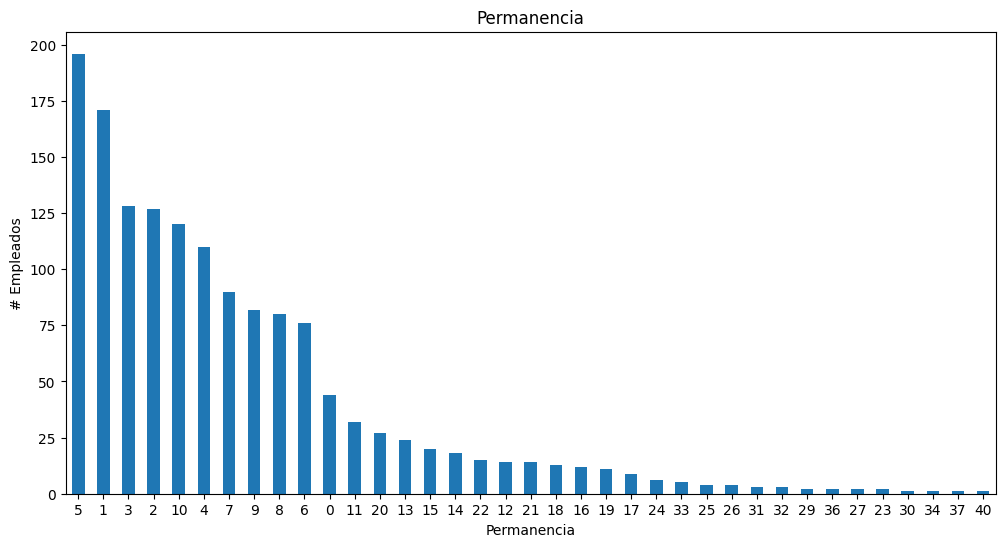

In [31]:
#Distribución de la permanencia

df.YearsAtCompany.value_counts().plot(kind="bar")
plt.title("Permanencia")
plt.xlabel("Permanencia")
plt.xticks(rotation=0)
plt.ylabel("# Empleados")
plt.show()

# Variables numéricas

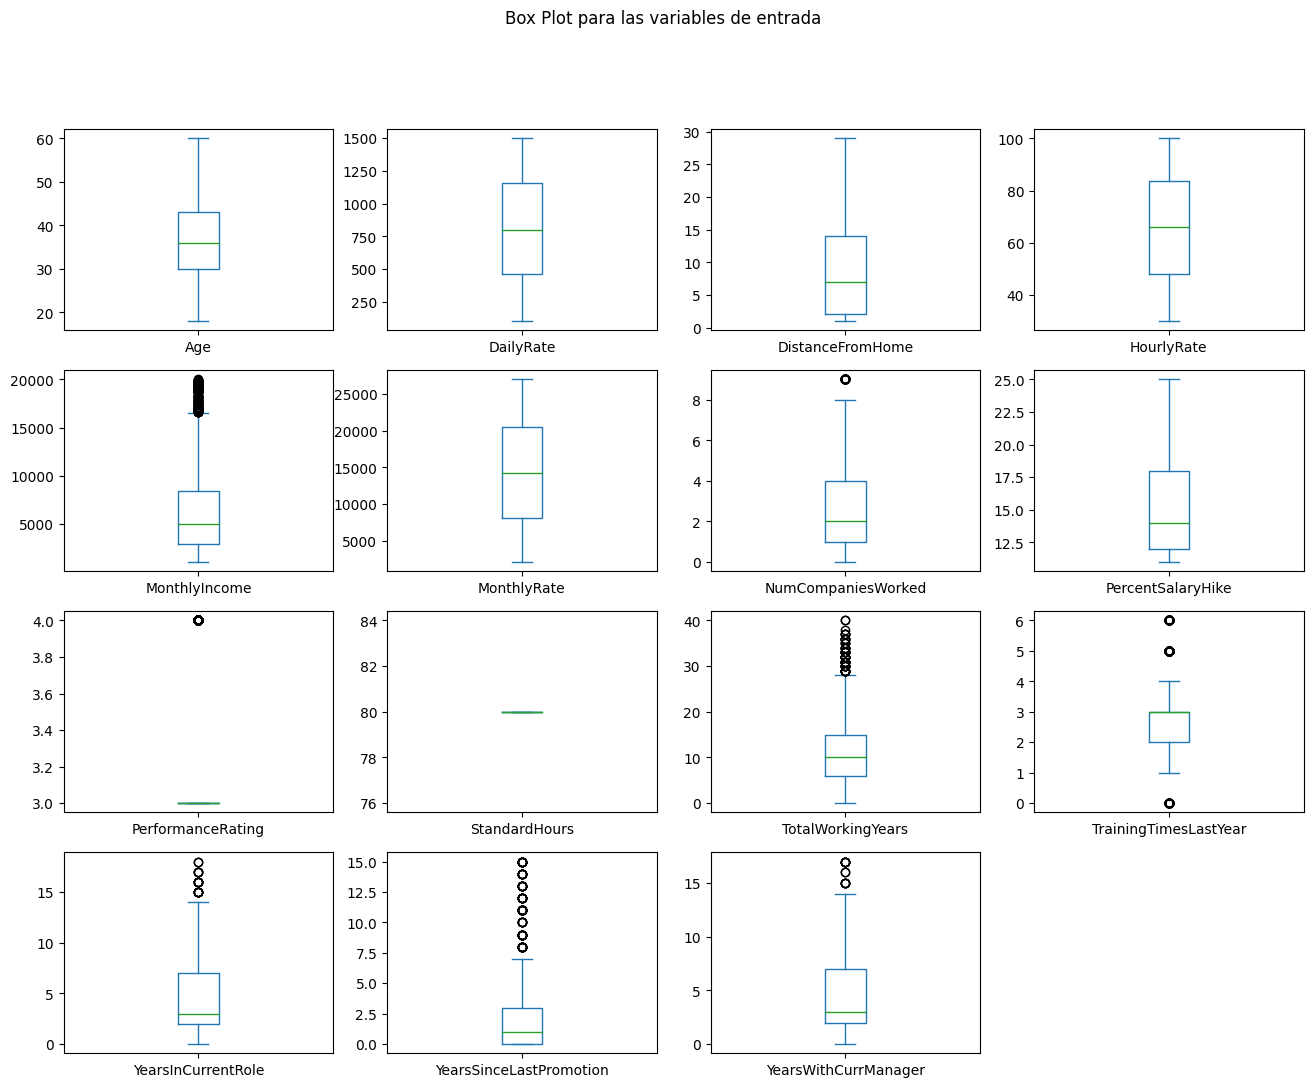

In [40]:
#Distribución de las variables de entrada

df.drop('YearsAtCompany', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16,12), title='Box Plot para las variables de entrada')
#plt.savefig('YearsAtCompany')
plt.show()

# Relación de variables numéricas

# Correlación de las variables numéricas

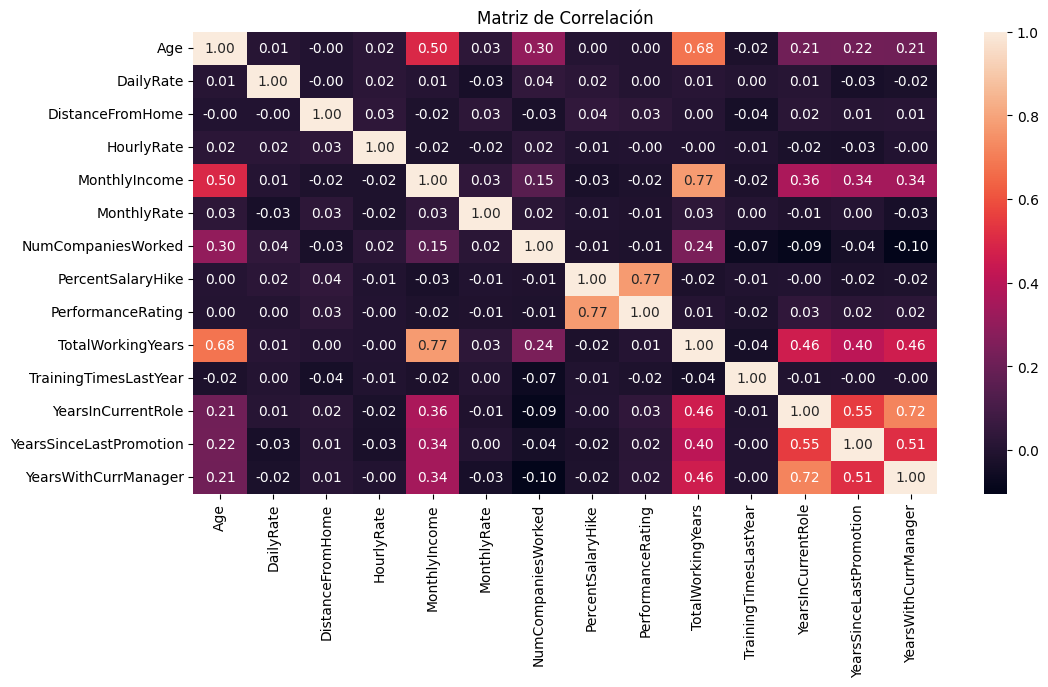

In [53]:
# Calcular la matriz de correlación
corr_matrix = df.drop(columns=['EmpID','YearsAtCompany','StandardHours']).select_dtypes(include=[np.number]).corr()

# Mostrar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

La correlación de 0.77 entre la calificación de desempeño (PerformanceRating) y el porcentaje de aumento salarial (PercentSalaryHike) sugiere que existe una fuerte relación positiva entre estas dos variables. Esto significa que, en general, los empleados que reciben mejores calificaciones en su desempeño tienden a recibir mayores aumentos salariales. La empresa podría estar utilizando las evaluaciones de desempeño como un factor clave en la decisión de los aumentos salariales.

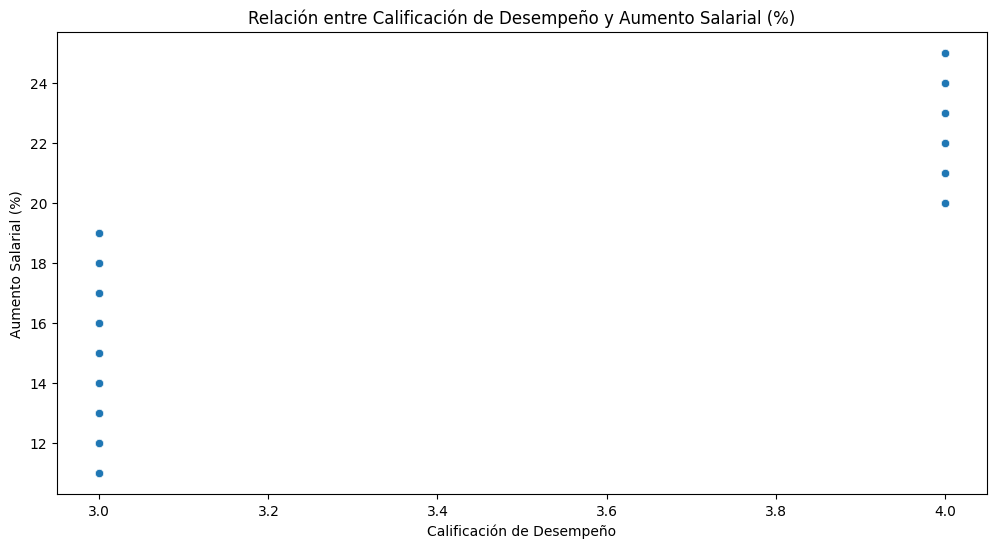

In [54]:
# Crear un scatterplot para visualizar la relación entre calificación de desempeño y porcentaje de aumento salarial
sns.scatterplot(x=df['PerformanceRating'], y=df['PercentSalaryHike'])
plt.title('Relación entre Calificación de Desempeño y Aumento Salarial (%)')
plt.xlabel('Calificación de Desempeño')
plt.ylabel('Aumento Salarial (%)')
plt.show()

# Identificar la distribución de los datos para las variables correlacionadas fuertemente

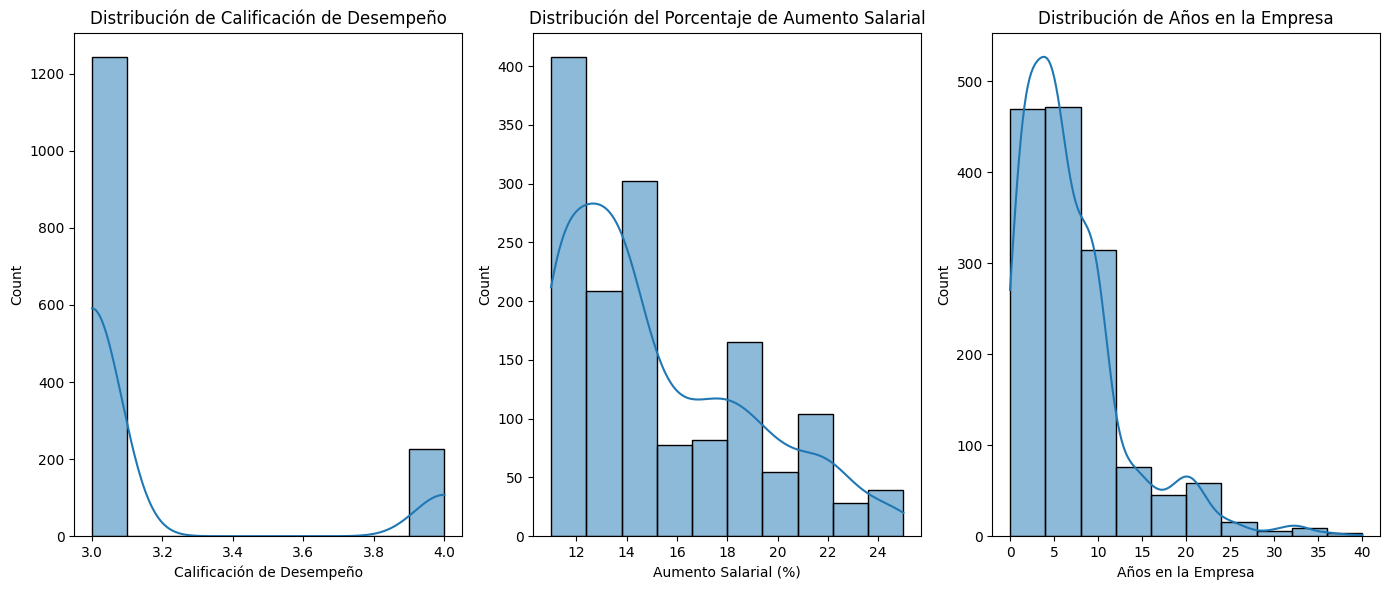

In [55]:
# Histograma para 'PerformanceRating'
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['PerformanceRating'], bins=10, kde=True)
plt.title('Distribución de Calificación de Desempeño')
plt.xlabel('Calificación de Desempeño')

# Histograma para 'PercentSalaryHike'
plt.subplot(1, 3, 2)
sns.histplot(df['PercentSalaryHike'], bins=10, kde=True)
plt.title('Distribución del Porcentaje de Aumento Salarial')
plt.xlabel('Aumento Salarial (%)')

# Histograma para 'YearsAtCompany'
plt.subplot(1, 3, 3)
sns.histplot(df['YearsAtCompany'], bins=10, kde=True)
plt.title('Distribución de Años en la Empresa')
plt.xlabel('Años en la Empresa')

plt.tight_layout()
plt.show()

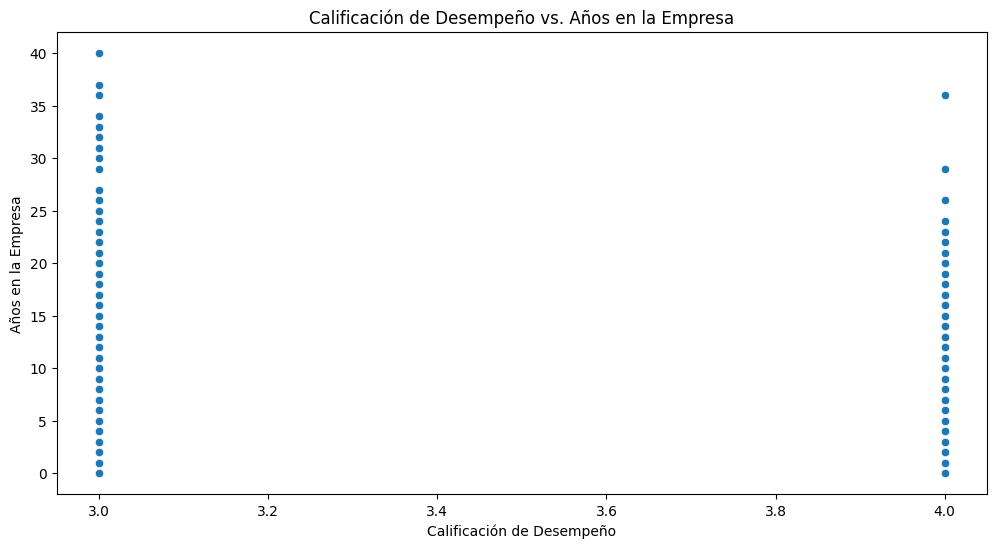

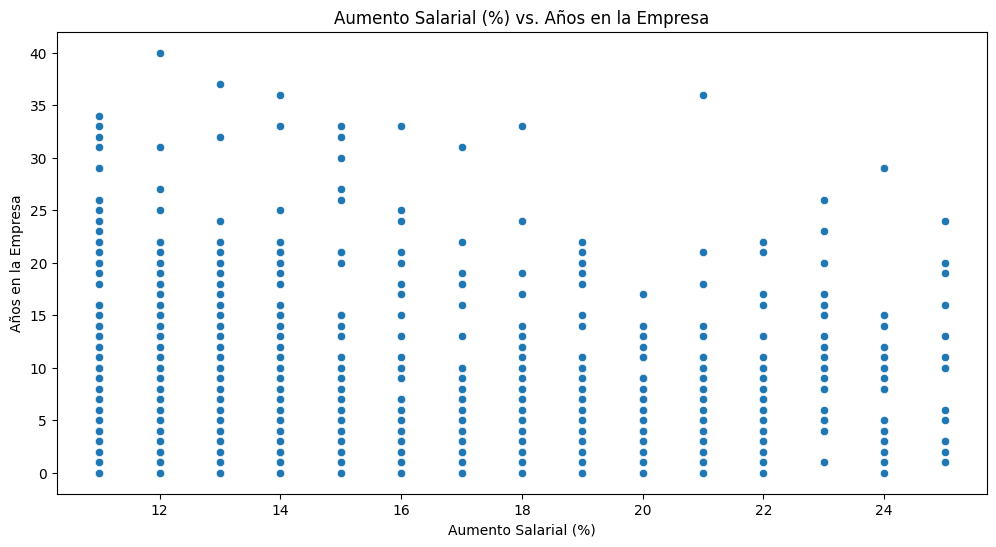

In [57]:
# Scatterplot entre 'PerformanceRating' y 'YearsAtCompany'
sns.scatterplot(x=df['PerformanceRating'], y=df['YearsAtCompany'])
plt.title('Calificación de Desempeño vs. Años en la Empresa')
plt.xlabel('Calificación de Desempeño')
plt.ylabel('Años en la Empresa')
plt.show()

# Scatterplot entre 'PercentSalaryHike' y 'YearsAtCompany'
sns.scatterplot(x=df['PercentSalaryHike'], y=df['YearsAtCompany'])
plt.title('Aumento Salarial (%) vs. Años en la Empresa')
plt.xlabel('Aumento Salarial (%)')
plt.ylabel('Años en la Empresa')
plt.show()

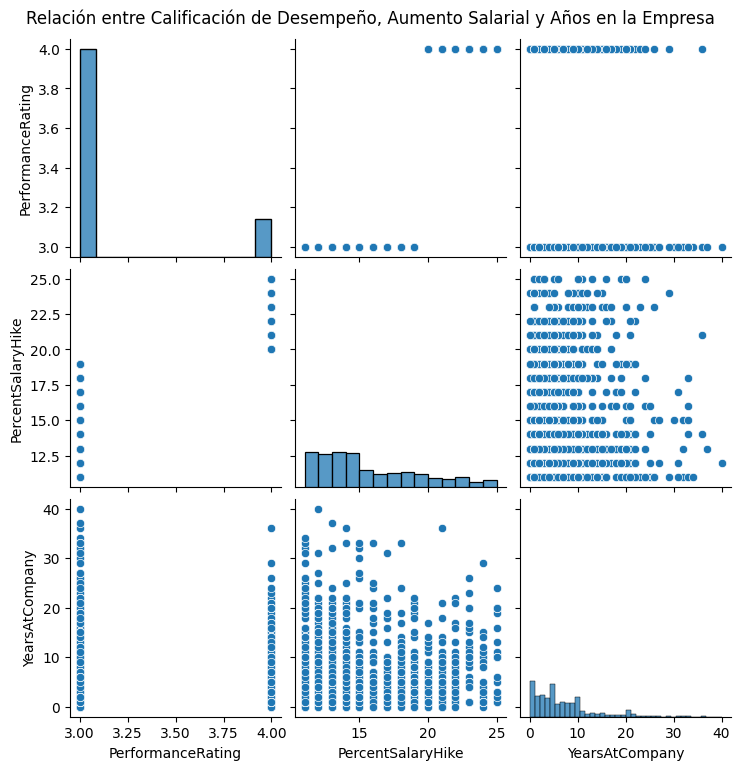

In [58]:
# Crear un pairplot para visualizar las tres variables juntas
sns.pairplot(df[['PerformanceRating', 'PercentSalaryHike', 'YearsAtCompany']])
plt.suptitle('Relación entre Calificación de Desempeño, Aumento Salarial y Años en la Empresa', y=1.02)
plt.show()

# Variables categóricas

Distribución de variables categóricas

In [79]:
# Lista de variables a excluir
exclude_vars = ['EmpID', 'EmployeeCount','EmployeeNumber']

# Listar las variables categóricas
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir las variables especificadas
categorical_vars = [var for var in categorical_vars if var not in exclude_vars]

# Mostrar el listado de variables categóricas
print("Variables categóricas en el dataset (excluyendo las especificadas):")
print(categorical_vars)

Variables categóricas en el dataset (excluyendo las especificadas):
['AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'SalarySlab', 'Over18', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


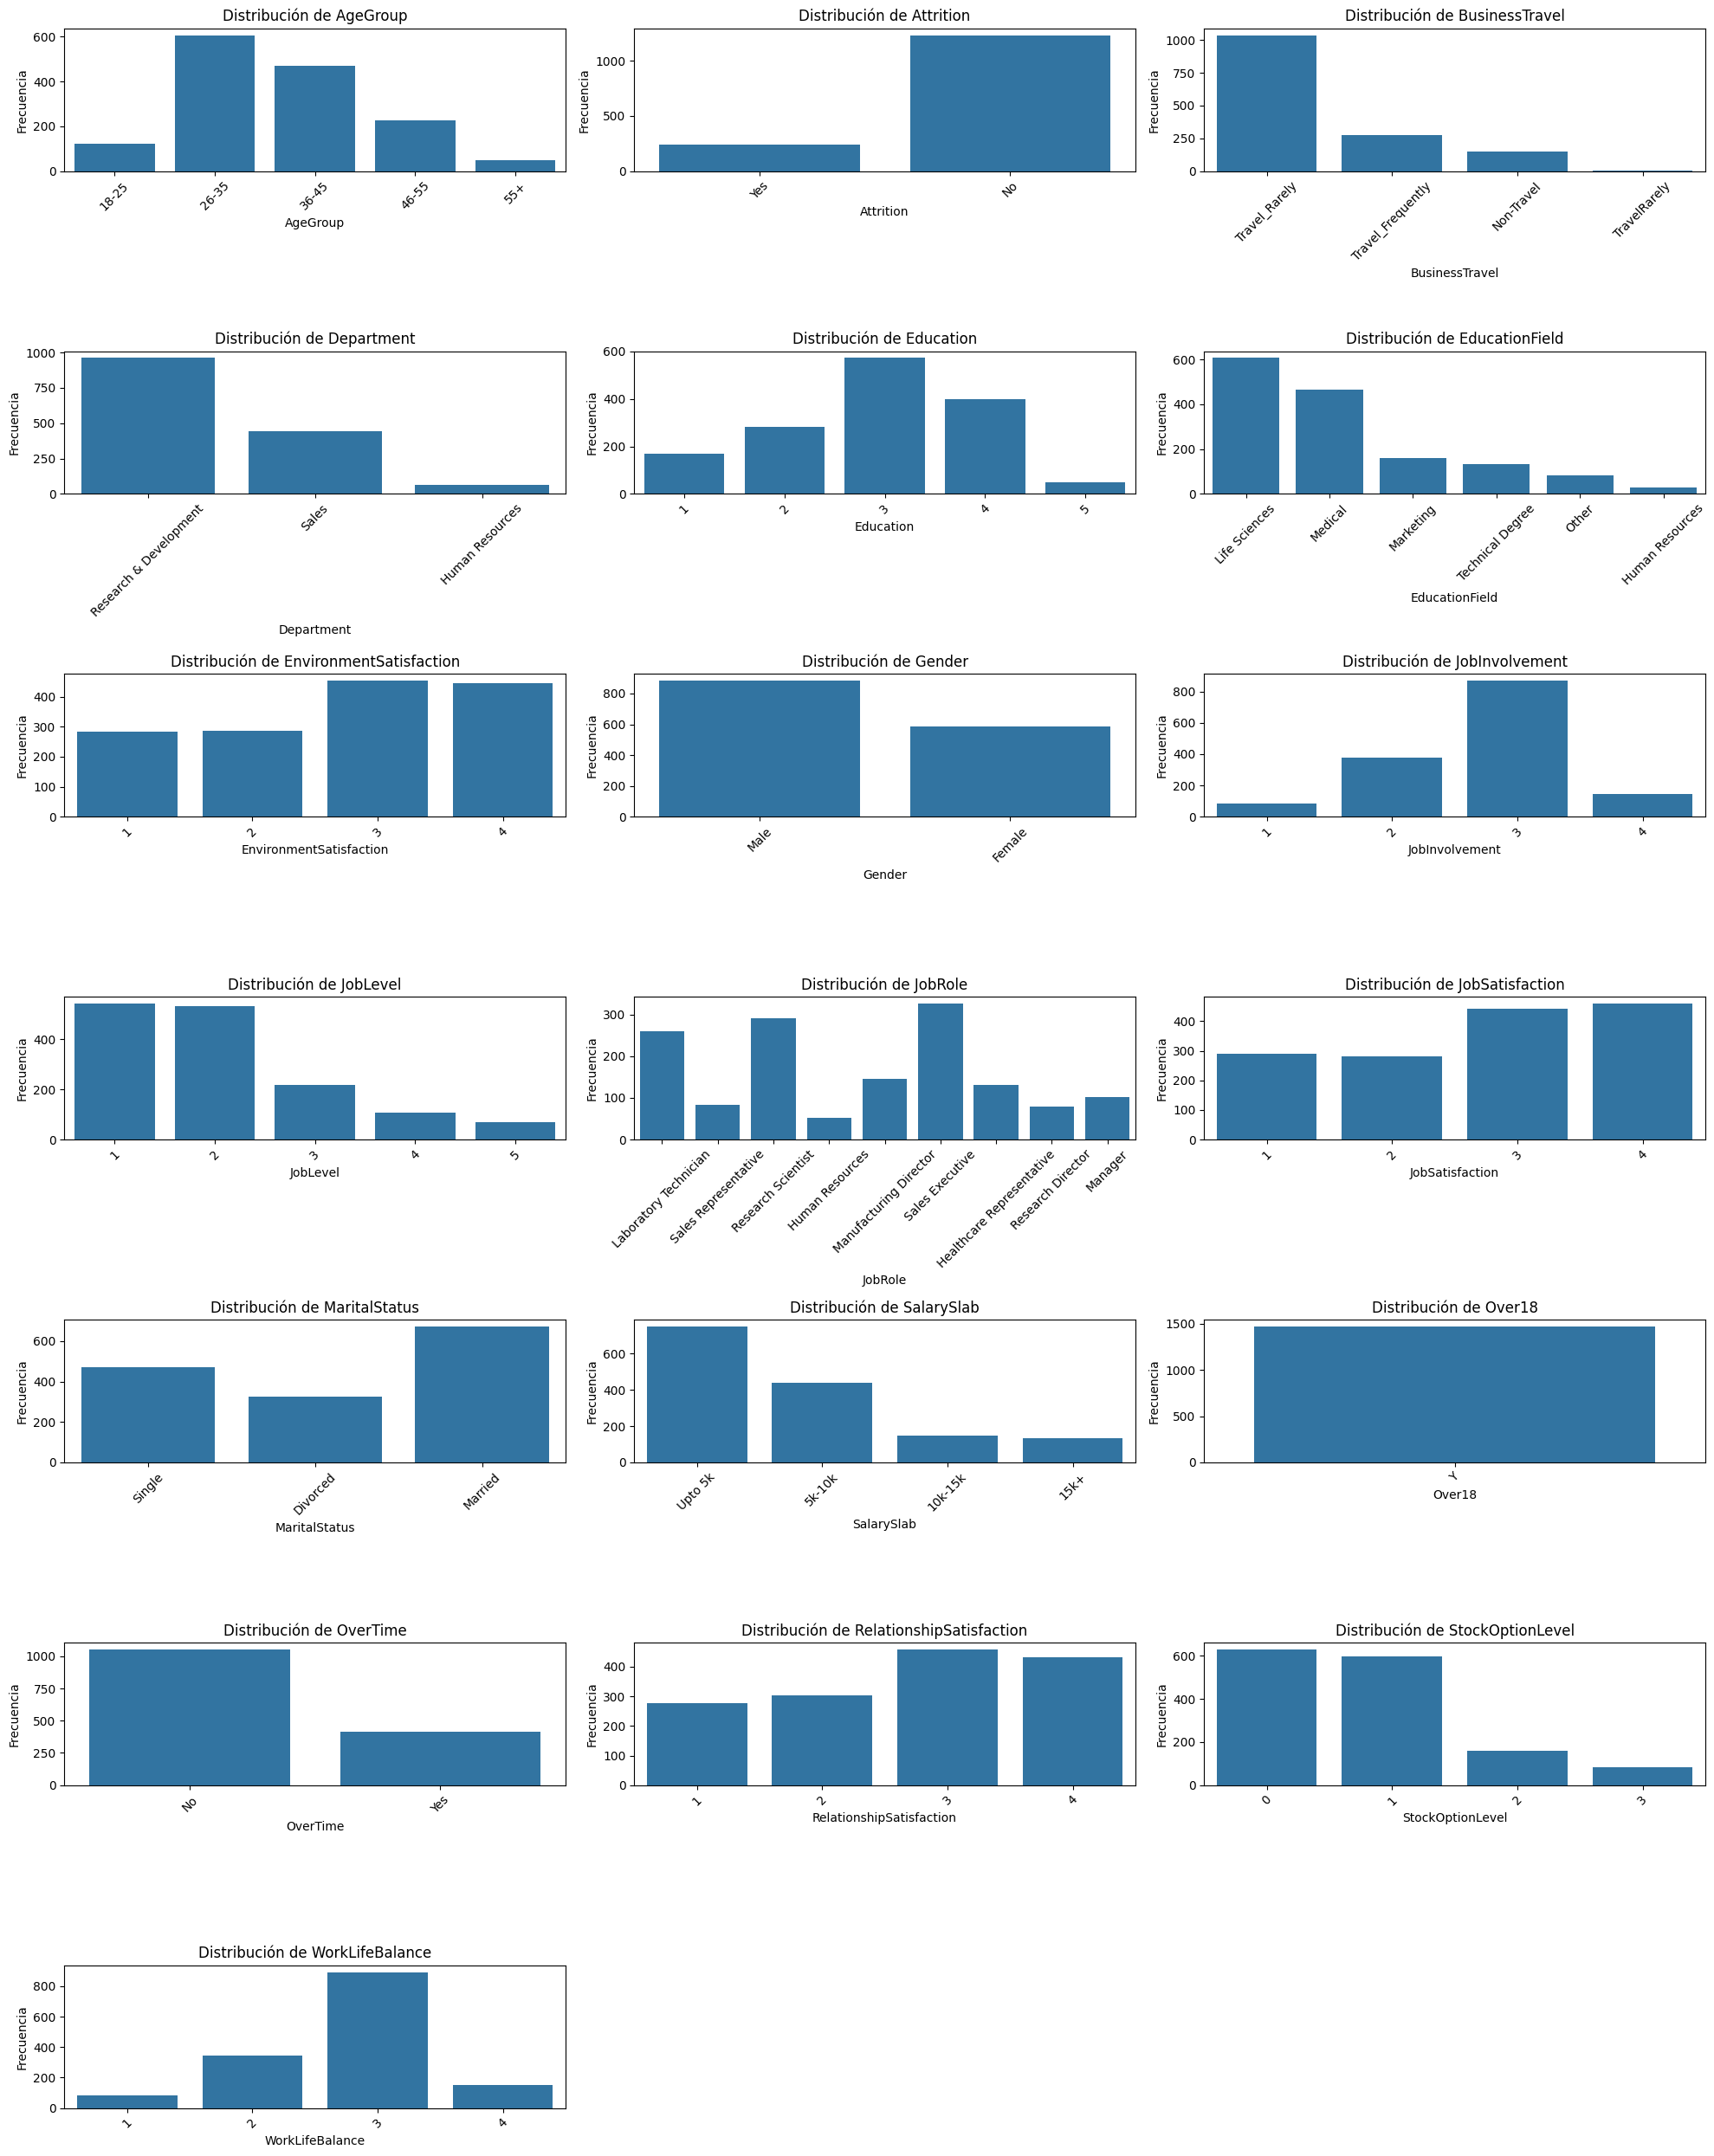

In [81]:
plt.figure(figsize=(20, 25))

for i, var in enumerate(categorical_vars):
    plt.subplot(7, 3, i+1)
    sns.countplot(x=var, data=df)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlación de variables categóricas

In [99]:
# Lista de columnas a excluir
exclude_vars = ['EmpID', 'EmployeeCount', 'EmployeeNumber','YearsAtCompany']

# Excluir las columnas no deseadas del DataFrame
df_filtered = df.drop(columns=exclude_vars)

# Aplicar codificación one-hot a las variables categóricas restantes
df_encoded = pd.get_dummies(df_filtered, drop_first=True)

# Recalcular la matriz de correlación con las variables categóricas codificadas
corr_matrix = df_encoded.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación entre Variables Categóricas Codificadas:")
corr_matrix

Matriz de Correlación entre Variables Categóricas Codificadas:


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StandardHours,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
Age,1.00,0.01,-0.00,0.02,0.50,0.03,0.30,0.00,0.00,NaN,...,0.03,-0.01,-0.01,0.05,0.11,-0.03,-0.00,0.02,-0.01,-0.01
DailyRate,0.01,1.00,-0.00,0.02,0.01,-0.03,0.04,0.02,0.00,NaN,...,0.01,0.01,-0.02,0.02,0.02,-0.01,0.04,0.03,-0.01,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.03,-0.02,0.03,-0.03,0.04,0.03,NaN,...,0.03,0.04,-0.01,0.00,-0.02,0.09,-0.01,0.01,0.01,-0.04
HourlyRate,0.02,0.02,0.03,1.00,-0.02,-0.02,0.02,-0.01,-0.00,NaN,...,-0.01,0.04,-0.03,0.01,-0.01,0.06,0.01,0.02,0.01,-0.02
MonthlyIncome,0.50,0.01,-0.02,-0.02,1.00,0.03,0.15,-0.03,-0.02,NaN,...,0.01,0.01,0.01,0.01,0.09,-0.02,-0.04,-0.00,0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
StockOptionLevel_2,-0.03,-0.01,0.09,0.06,-0.02,0.01,-0.01,-0.01,-0.01,NaN,...,-0.03,0.01,-0.04,0.01,-0.29,1.00,-0.09,0.03,-0.02,0.01
StockOptionLevel_3,-0.00,0.04,-0.01,0.01,-0.04,-0.02,0.04,-0.02,-0.01,NaN,...,0.03,-0.02,0.05,-0.03,-0.20,-0.09,1.00,0.01,0.03,-0.02
WorkLifeBalance_2,0.02,0.03,0.01,0.02,-0.00,-0.00,-0.00,-0.03,-0.02,NaN,...,0.02,0.01,0.03,-0.03,0.02,0.03,0.01,1.00,-0.69,-0.19
WorkLifeBalance_3,-0.01,-0.01,0.01,0.01,0.01,0.02,-0.04,0.03,0.01,NaN,...,0.00,-0.01,-0.02,0.02,-0.03,-0.02,0.03,-0.69,1.00,-0.42


In [100]:
# Filtrar correlaciones fuertes (mayores o iguales a 0.7) para ver las más significativas
mask = corr_matrix.abs() >= 0.7
strong_corrs = corr_matrix[mask].stack()
strong_corrs = strong_corrs[strong_corrs.index.get_level_values(0) != strong_corrs.index.get_level_values(1)]
print("\nCorrelaciones Fuertes:")
print(strong_corrs.sort_values(ascending=False))


Correlaciones Fuertes:
JobRole_Sales Executive            Department_Sales                     0.81
Department_Sales                   JobRole_Sales Executive              0.81
SalarySlab_15k+                    MonthlyIncome                        0.77
MonthlyIncome                      SalarySlab_15k+                      0.77
PercentSalaryHike                  PerformanceRating                    0.77
PerformanceRating                  PercentSalaryHike                    0.77
MonthlyIncome                      TotalWorkingYears                    0.77
TotalWorkingYears                  MonthlyIncome                        0.77
SalarySlab_15k+                    JobRole_Manager                      0.72
JobRole_Manager                    SalarySlab_15k+                      0.72
YearsInCurrentRole                 YearsWithCurrManager                 0.72
YearsWithCurrManager               YearsInCurrentRole                   0.72
JobLevel_5                         SalarySlab_15k+  

Ahora sería conveniente mirar la relación de cada una de estas varibles con los años en la compañía

In [101]:
# Lista de variables para analizar
variables_to_analyze = [
    'JobRole_Sales Executive', 'Department_Sales', 'SalarySlab_15k+', 'MonthlyIncome',
    'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'JobRole_Manager',
    'YearsInCurrentRole', 'YearsWithCurrManager', 'JobLevel_5', 'JobInvolvement_2',
    'JobInvolvement_3', 'Department_Research & Development', 'JobRole_Sales Executive',
    'BusinessTravel_Travel_Rarely', 'BusinessTravel_Travel_Frequently'
]

variables_to_analyze = [var for var in variables_to_analyze if var in df.columns]

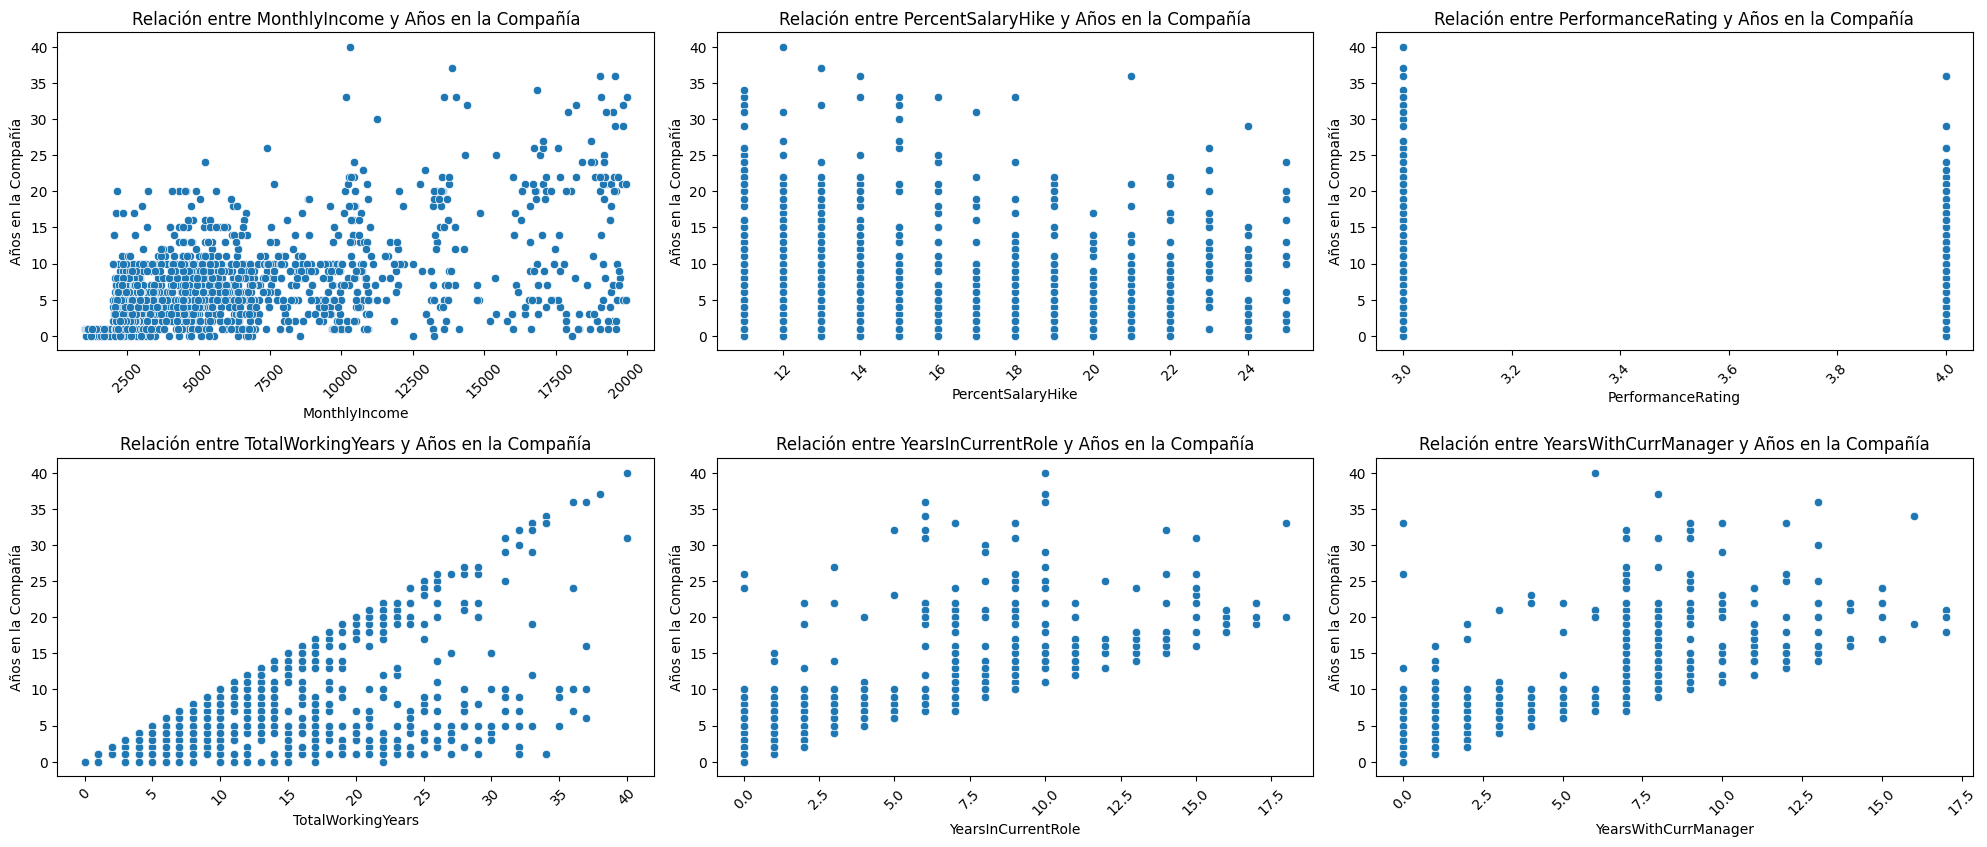

In [102]:
plt.figure(figsize=(20, 25))

# Visualizar la relación usando boxplots para variables categóricas y scatterplots para numéricas
for i, var in enumerate(variables_to_analyze):
    plt.subplot(6, 3, i + 1)

    if df[var].dtype == 'object':  # Para variables categóricas
        sns.boxplot(x=df[var], y=df['YearsAtCompany'])
        plt.title(f'Relación entre {var} y Años en la Compañía')
    else:  # Para variables numéricas
        sns.scatterplot(x=df[var], y=df['YearsAtCompany'])
        plt.title(f'Relación entre {var} y Años en la Compañía')

    plt.xlabel(var)
    plt.ylabel('Años en la Compañía')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Visualización de cada par de correlación fuerte co la variable objetivo 'YearsAtCompany'

In [115]:
# Codificar las variables categóricas en el DataFrame
df_encoded = pd.get_dummies(df, columns=[
    'JobRole', 'Department', 'SalarySlab', 'BusinessTravel', 'EducationField',
    'Gender', 'MaritalStatus', 'Over18', 'OverTime', 'JobInvolvement',
    'PerformanceRating', 'RelationshipSatisfaction'
], drop_first=True)

# Incluir 'YearsAtCompany' para el análisis
df_encoded = df_encoded[['YearsAtCompany'] + [col for col in df_encoded.columns if col != 'YearsAtCompany']]

In [116]:
# Lista de variables categóricas dummies para analizar
variables_categorical_dummies = [
    'JobRole_Sales Executive', 'Department_Sales', 'SalarySlab_15k+', 'BusinessTravel_Travel_Rarely',
    'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'JobRole_Manager',
    'JobInvolvement_2', 'JobInvolvement_3', 'JobLevel_5', 'PercentSalaryHike', 'PerformanceRating',
    'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'
]

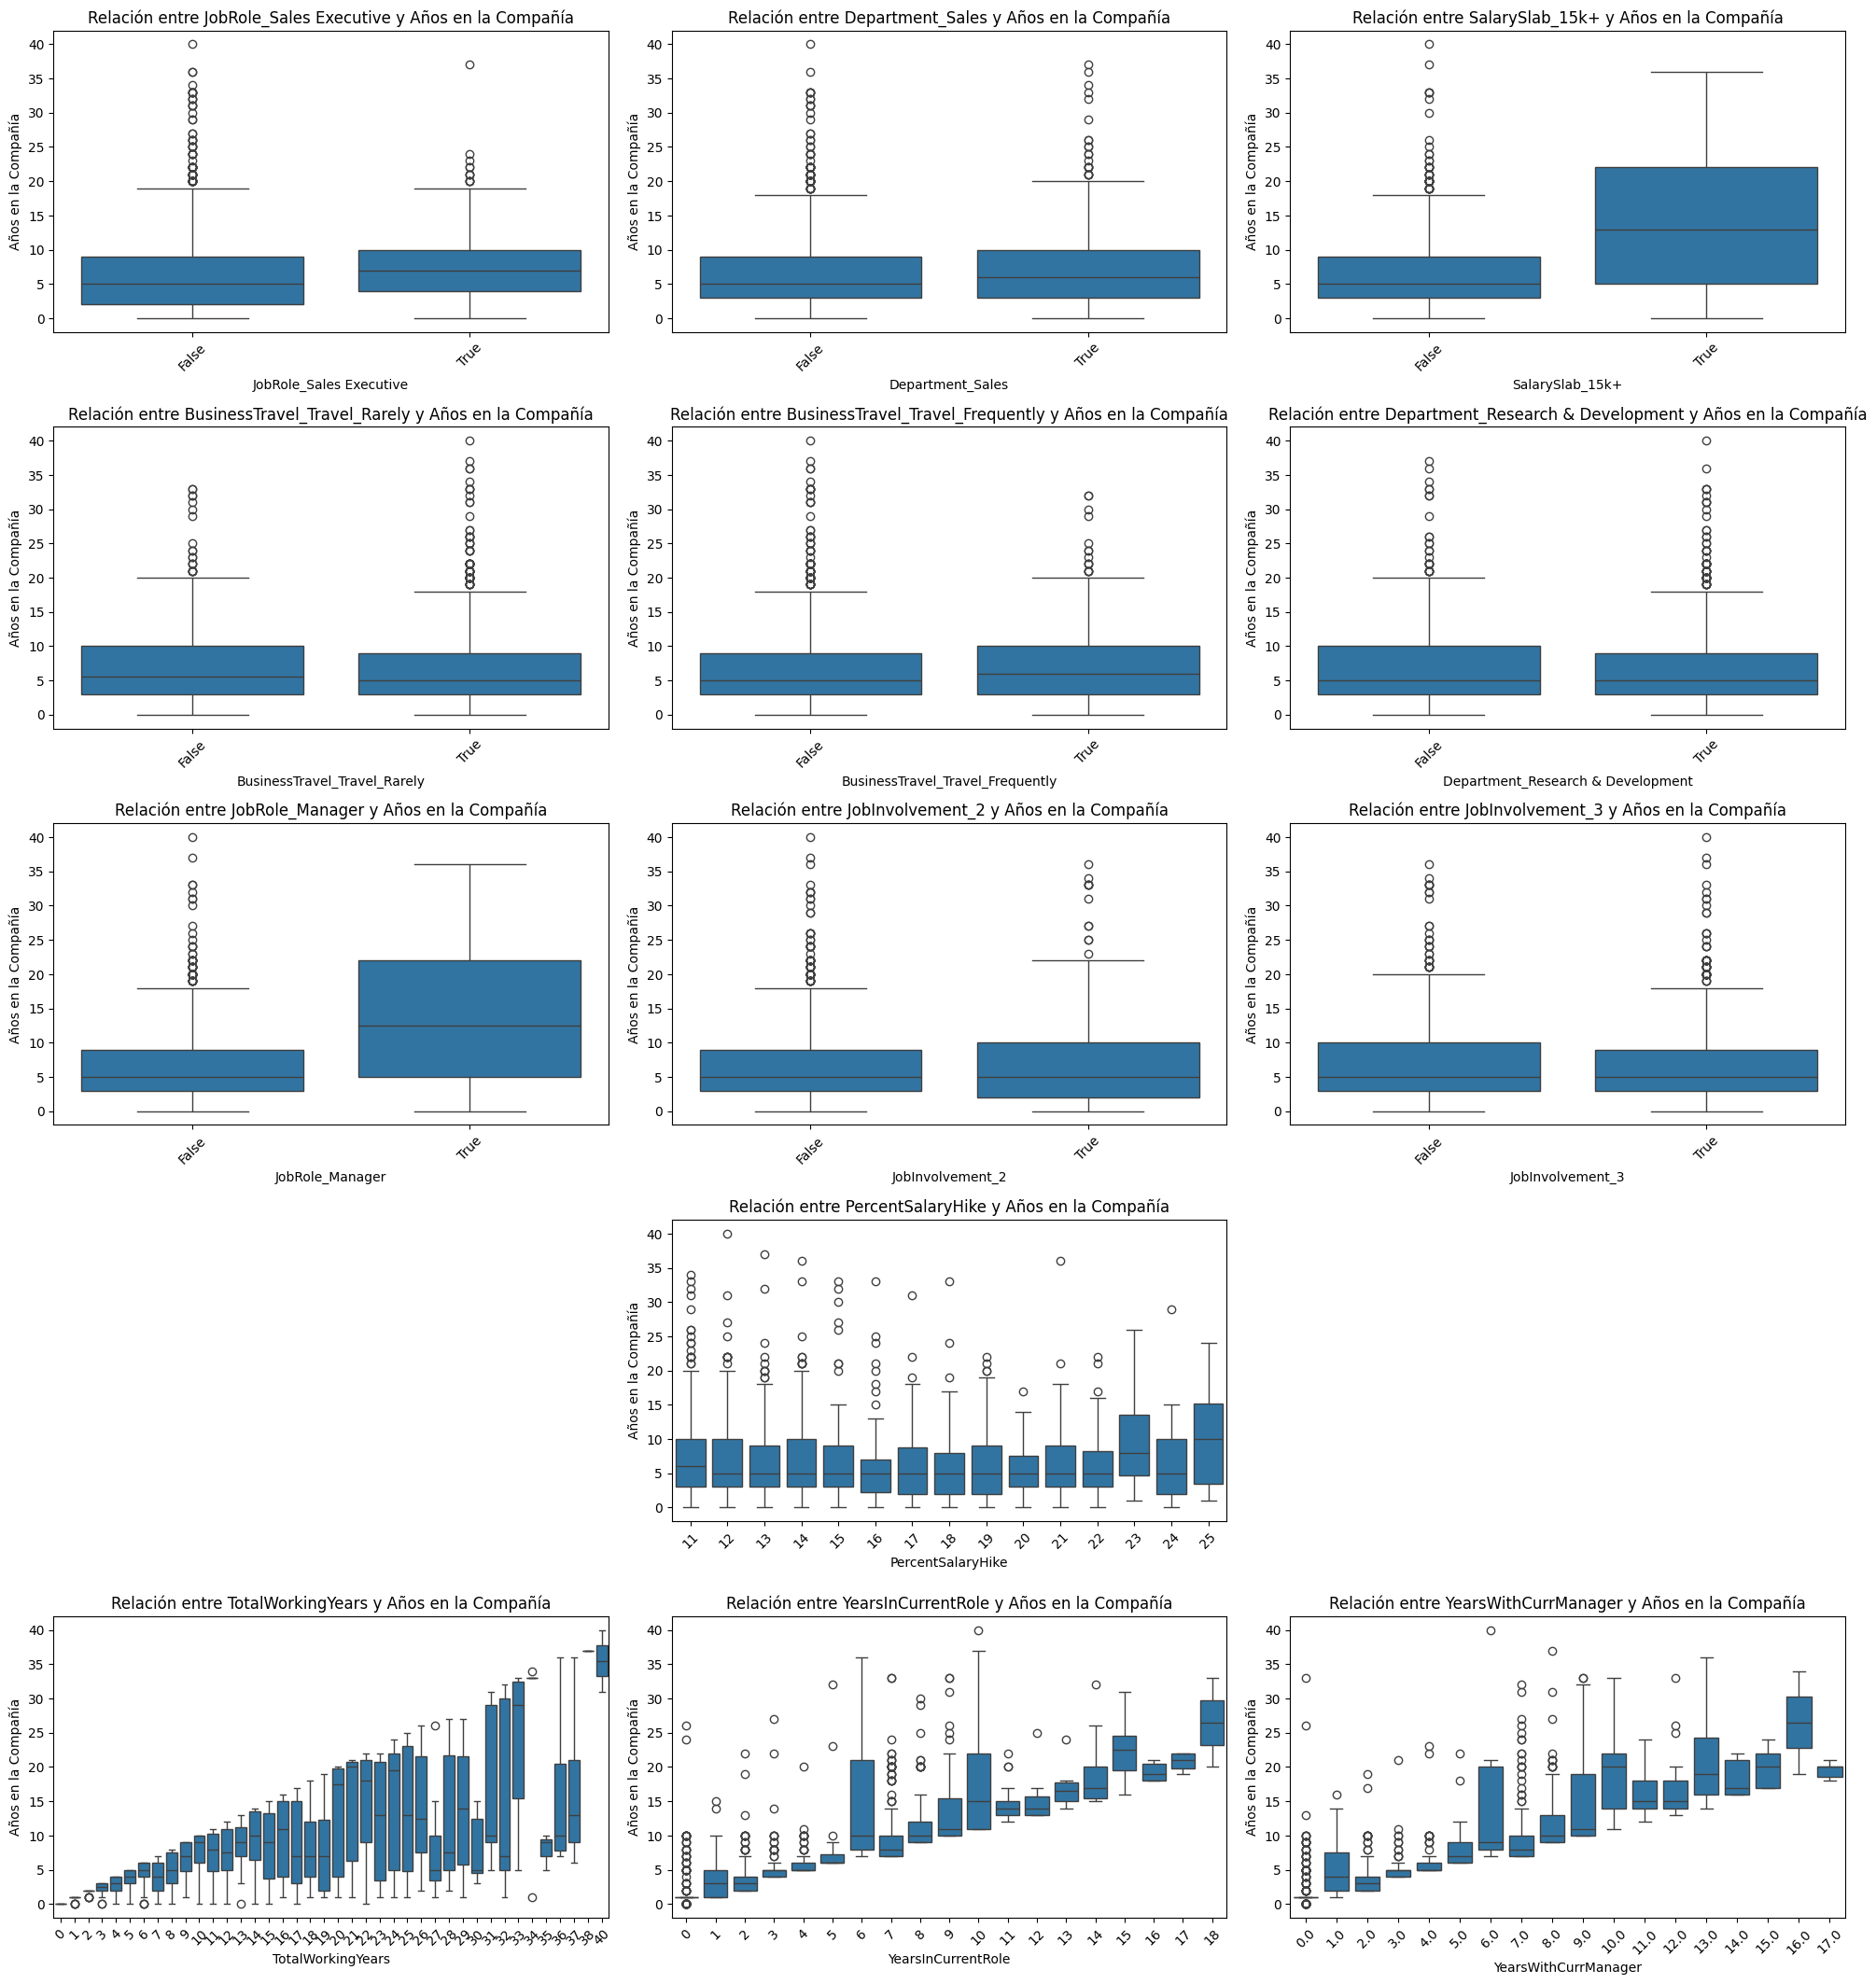

In [117]:
plt.figure(figsize=(20, 25))

for i, var in enumerate(variables_categorical_dummies):
    if var in df_encoded.columns:
        plt.subplot(6, 3, i + 1)
        sns.boxplot(x=df_encoded[var], y=df_encoded['YearsAtCompany'])
        plt.title(f'Relación entre {var} y Años en la Compañía')
        plt.xlabel(var)
        plt.ylabel('Años en la Compañía')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

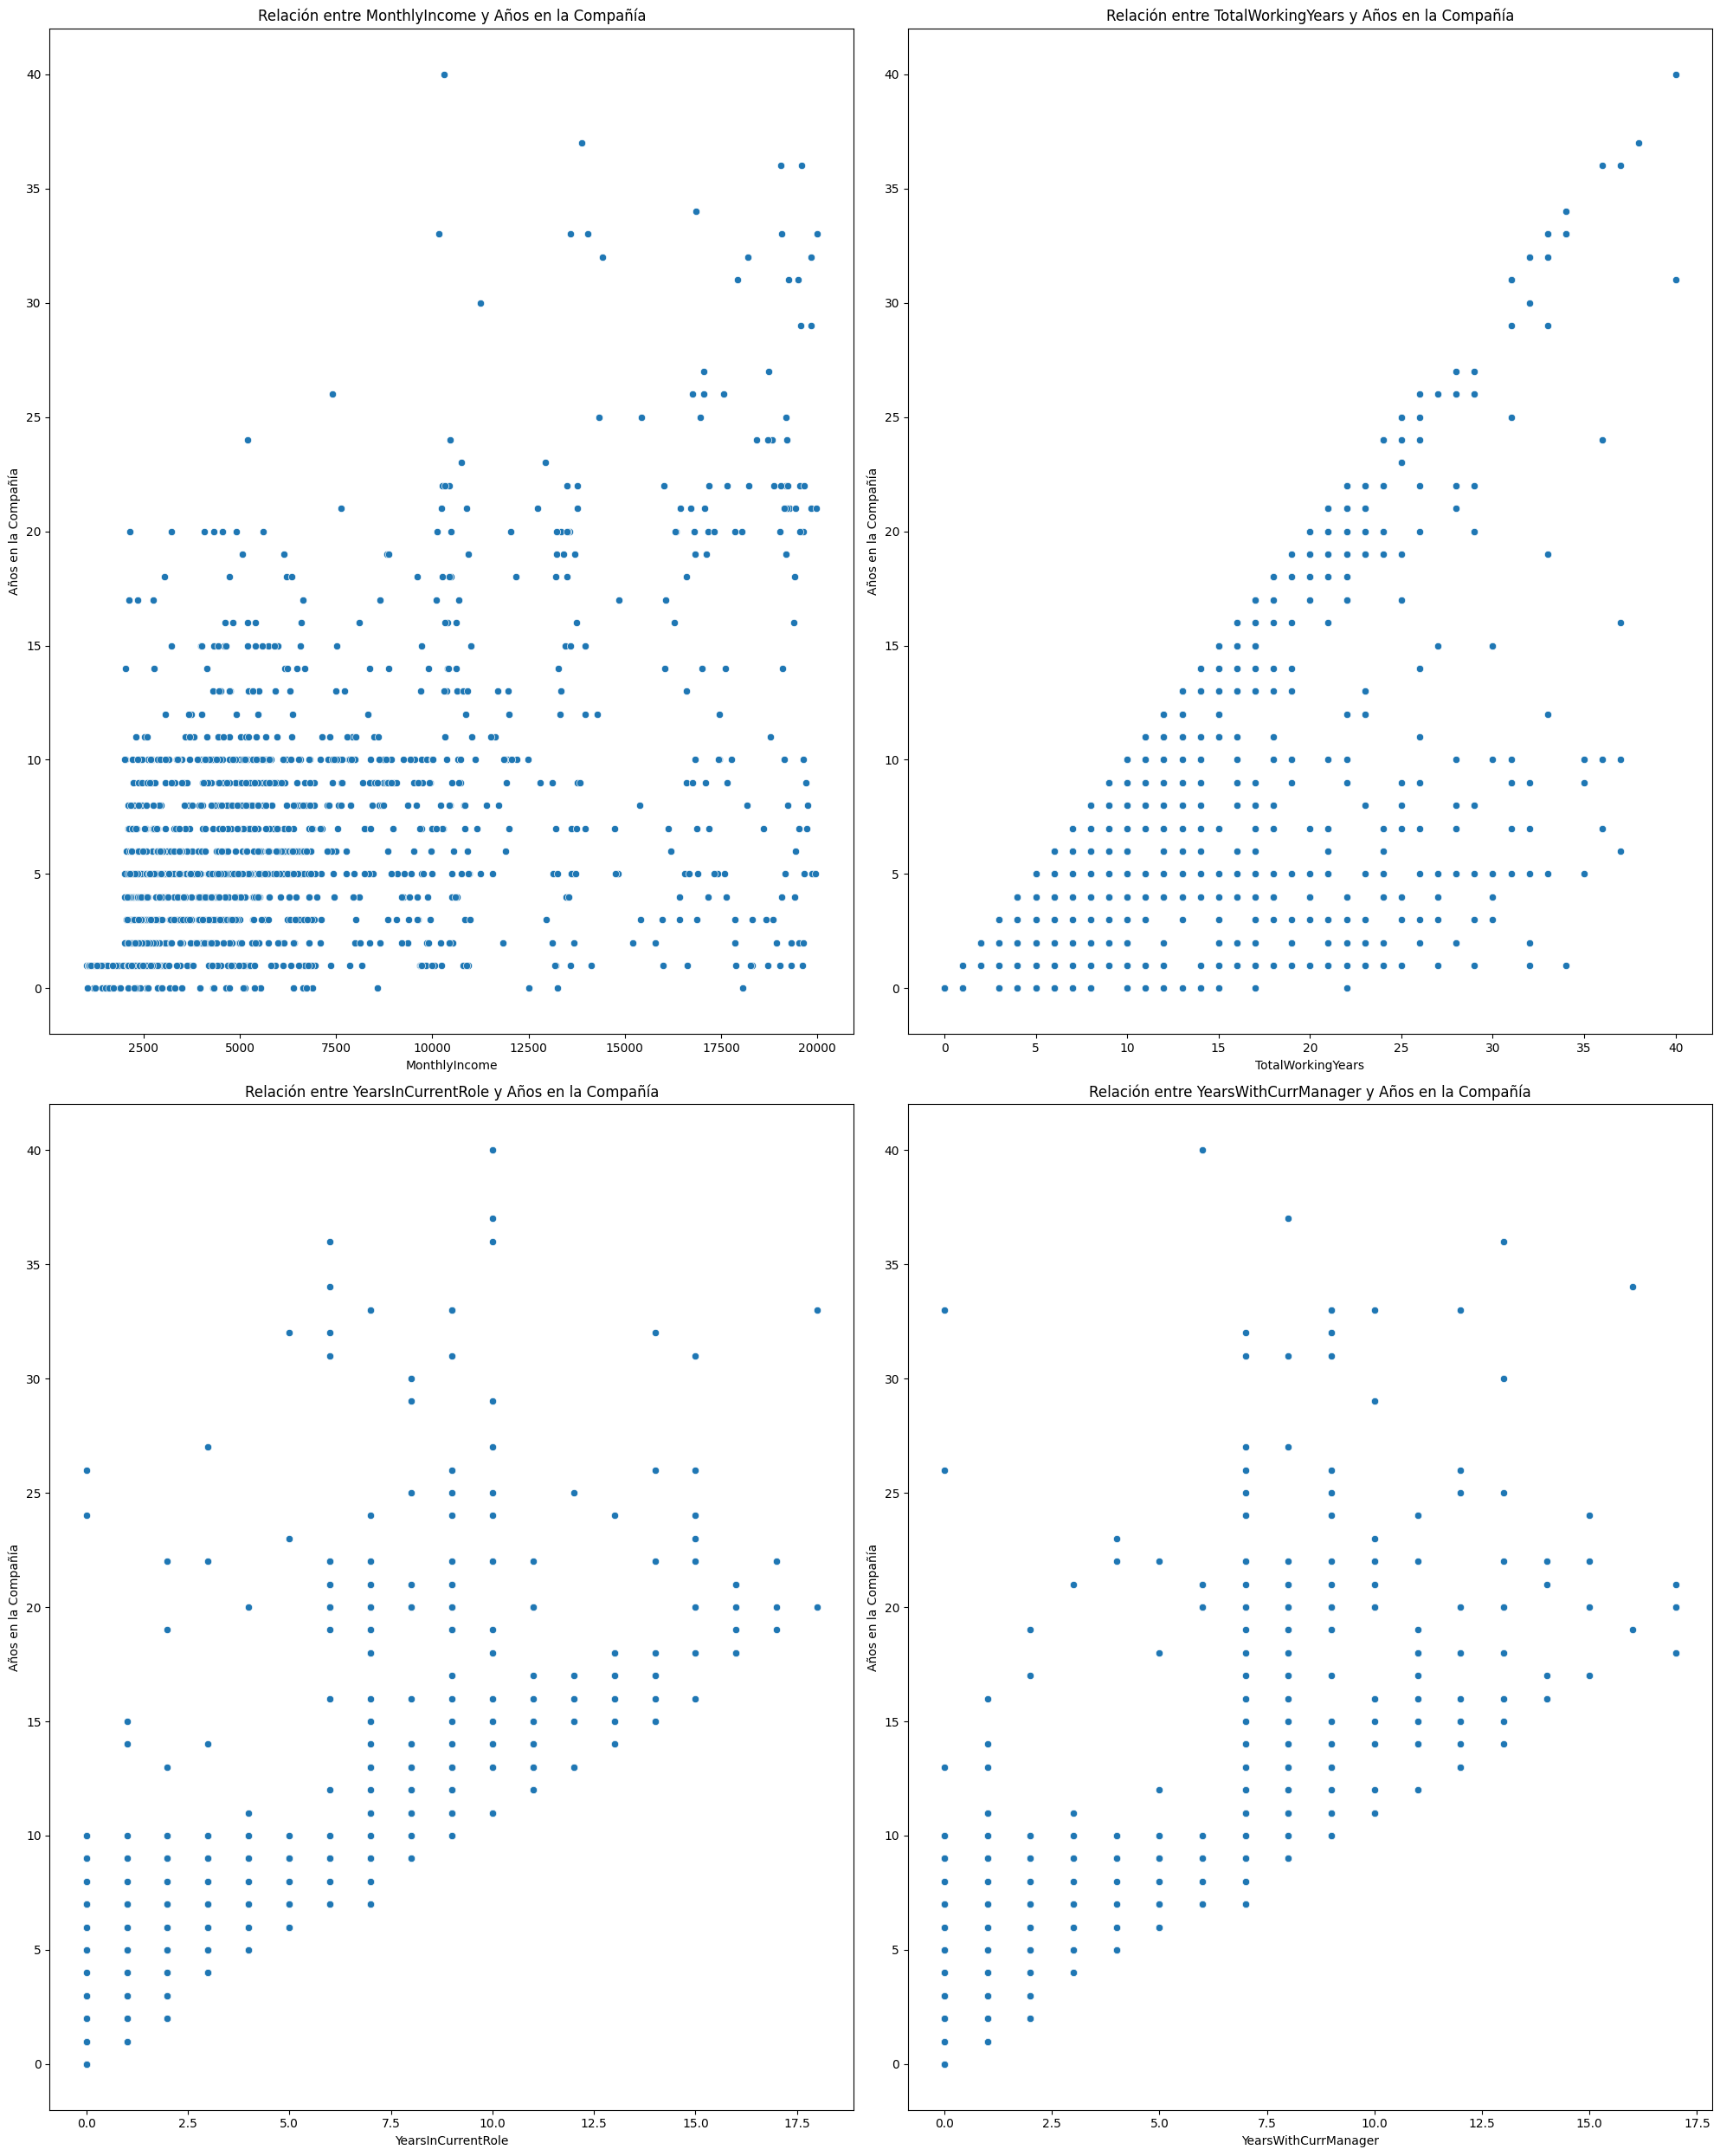

In [112]:
plt.figure(figsize=(20, 25))

variables_numericas = ['MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']

for i, var in enumerate(variables_numericas):
    if var in df_encoded.columns:
        plt.subplot(2, 2, i + 1)
        sns.scatterplot(x=df_encoded[var], y=df_encoded['YearsAtCompany'])
        plt.title(f'Relación entre {var} y Años en la Compañía')
        plt.xlabel(var)
        plt.ylabel('Años en la Compañía')

plt.tight_layout()
plt.show()

# Conclusiones

Es necesario realizar un trabajo adicional en la subcategorización y en el análisis de las relaciones de dependencia agrupadas para identificar las variables clave que influyen en la permanencia del personal. El análisis actual ha permitido identificar variables relevantes como los roles ejecutivos y de gerencia, los sueldos superiores a 15k, los viajes de negocios, la participación en trabajos con niveles de involucramiento 2 y 3, así como el nivel de trabajo 5. Además, se han considerado el porcentaje de aumento salarial, la calificación del desempeño y los años de servicio. Estas variables proporcionan una base sólida para entender mejor los factores que afectan la permanencia.